# DANDI:001341 - Barrel Cortex Activity During VR Navigation

**⚠️ Note: This notebook was AI-generated with human supervision and has not been fully verified. Please be cautious when interpreting the code or results.**

This notebook provides an introduction to the [DANDI:001341](https://neurosift.app/dandiset/001341) dataset, which contains electrophysiological recordings from the C2 barrel column of the primary somatosensory cortex (wS1) in mice during tactile virtual reality (VR) navigation.

In this experiment:
- Mice were head-fixed on a suspended ball
- Two walls were placed on either side of the mouse
- Wall movement was coupled to the mouse's trajectory in real-time
- Mice navigated through a virtual corridor with left/right turns
- Neural activity was recorded from the C2 barrel column
- Trial structure: 100cm straight running followed by 2s open-loop turn

## Loading Required Libraries and Data

First, let's import the necessary libraries and load the dataset. We'll use:
- `pynwb` for reading NWB files
- `lindi` for remote data access
- `numpy` for numerical operations
- `matplotlib` for plotting

In [1]:
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt

# Load the first subject's data - note this loads from a remote source
print("Loading NWB file...")
# For reference, there are two NWB files in this dataset:
# 1. sub-489/sub-489_ses-20220708.nwb
# 2. sub-503/sub-503_ses-20220902.nwb
# We'll work with the first one for this example
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001341/assets/e3d421c3-13bf-4b2e-b0f9-b6357a885de9/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

Loading NWB file...


## Dataset Overview

Let's examine the basic information about the recording session and subject:

In [2]:
print("Subject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Age: {nwb.subject.age}")
print(f"Sex: {nwb.subject.sex}")
print(f"Genotype: {nwb.subject.genotype}")
print("\nExperiment Details:")
print(f"Description: {nwb.experiment_description}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")

Subject Information:
Subject ID: 489
Age: P63D
Sex: F
Genotype: Scnn1a-TG3-Cre x Ai32

Experiment Details:
Description: Barrel cortex electrophysiology during tactile VR whisker-guided navigation
Lab: Vlasov BioLab
Institution: University of Illinois


## Neural Data Organization

The dataset contains single-unit recordings from the C2 barrel column. Each unit has associated metadata including:
- Layer location
- Cell type (excitatory/inhibitory)
- Quality metrics (SNR, isolation distance, etc.)
- Spike times

Let's examine the distribution of units across cortical layers:

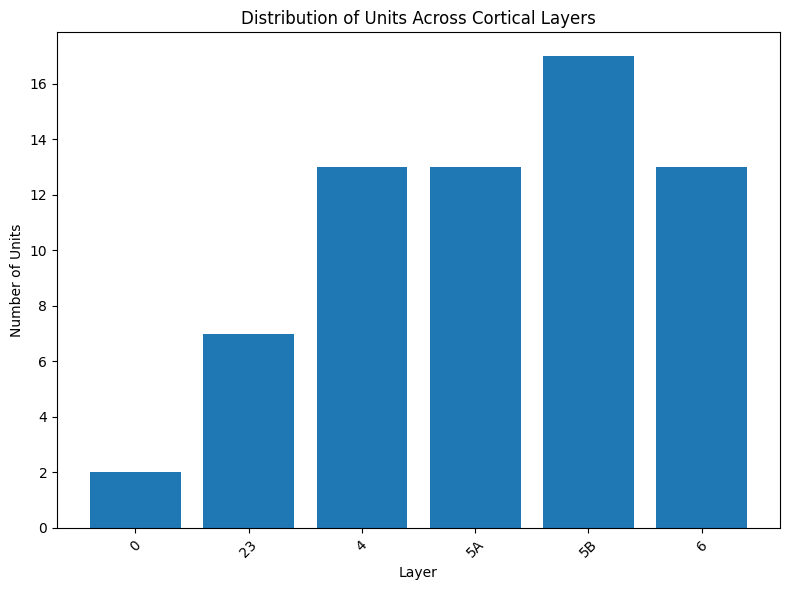


Unit counts by layer:
Layer 0: 2 units
Layer 23: 7 units
Layer 4: 13 units
Layer 5A: 13 units
Layer 5B: 17 units
Layer 6: 13 units


In [3]:
units = nwb.units
layers = units['layer'].data[:]
unique_layers, layer_counts = np.unique(layers, return_counts=True)

plt.figure(figsize=(8, 6))
plt.bar(range(len(unique_layers)), layer_counts)
plt.xticks(range(len(unique_layers)), unique_layers, rotation=45)
plt.title('Distribution of Units Across Cortical Layers')
plt.xlabel('Layer')
plt.ylabel('Number of Units')
plt.tight_layout()
plt.show()

print("\nUnit counts by layer:")
for layer, count in zip(unique_layers, layer_counts):
    print(f"Layer {layer}: {count} units")

## Behavioral and Neural Data

The dataset includes several measurements during VR navigation:
1. Behavioral data:
   - VR corridor position feedback (cor_pos)
   - Forward and lateral movement speeds
   - Trial information and timing
2. Neural data:
   - Spike times for each unit
   - Unit classifications and quality metrics

Let's examine an example segment of behavioral data along with neural activity:

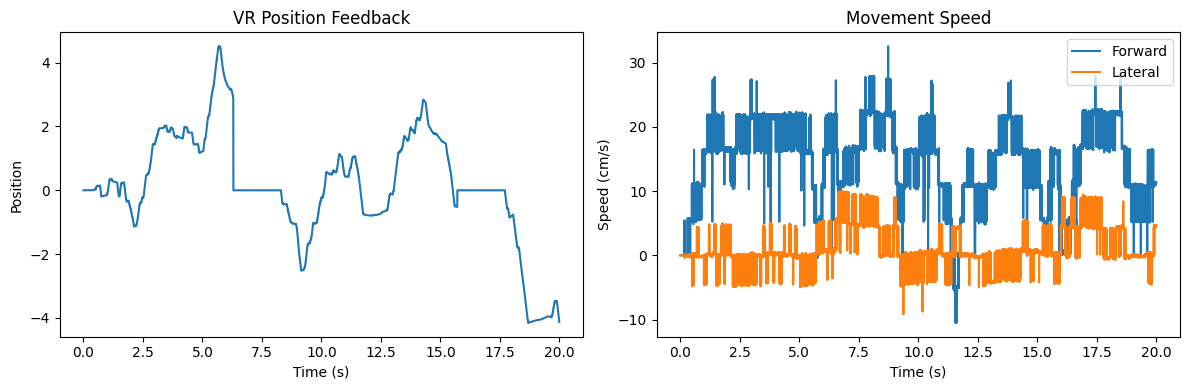

In [4]:
# Load a segment of behavioral data
n_timepoints = 10000  # ~16.7 minutes at 10Hz sampling
cor_pos = nwb.acquisition['cor_pos'].data[:n_timepoints]  # VR feedback signal
speed_for = nwb.acquisition['speed_for'].data[:n_timepoints]  # Forward speed
speed_lat = nwb.acquisition['speed_lat'].data[:n_timepoints]  # Lateral speed
timestamps = nwb.acquisition['cor_pos'].timestamps[:n_timepoints]

# Plot behavioral data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(timestamps, cor_pos)
plt.title('VR Position Feedback')
plt.xlabel('Time (s)')
plt.ylabel('Position')

plt.subplot(1, 2, 2)
plt.plot(timestamps, speed_for, label='Forward')
plt.plot(timestamps, speed_lat, label='Lateral')
plt.title('Movement Speed')
plt.xlabel('Time (s)')
plt.ylabel('Speed (cm/s)')
plt.legend()
plt.tight_layout()
plt.show()

## Example Neural Analysis: Speed Modulation

As an example analysis, let's examine how neural activity varies with the animal's movement speed. We'll:
1. Select a representative unit
2. Calculate firing rates at different movement speeds
3. Visualize the speed-firing rate relationship

Note: We're using a subset of the data for illustration. The full dataset contains many more trials and units.

Selected unit 46:
Firing rate: 2.95 Hz
Layer: 5B
Cell type: Excitatory


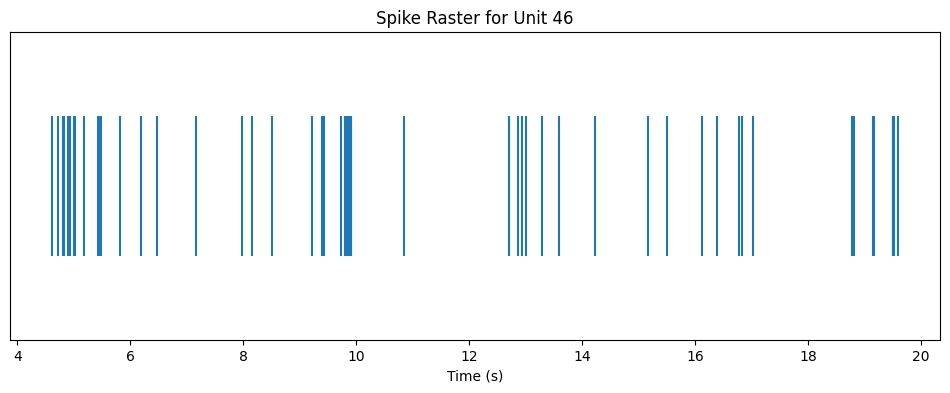

In [5]:
# Find a unit with typical firing rate for analysis
firing_rates = units['firing_rate'].data[:]
median_fr = np.median(firing_rates)
unit_idx = np.argmin(np.abs(firing_rates - median_fr))
example_unit_spikes = units['spike_times'][unit_idx]

print(f"Selected unit {unit_idx}:")
print(f"Firing rate: {firing_rates[unit_idx]:.2f} Hz")
print(f"Layer: {units['layer'].data[:][unit_idx]}")
print(f"Cell type: {units['unit_type'].data[:][unit_idx]}")

# Create spike raster
mask = (example_unit_spikes >= timestamps[0]) & (example_unit_spikes <= timestamps[-1])
spikes_in_window = example_unit_spikes[mask]

plt.figure(figsize=(12, 4))
plt.eventplot([spikes_in_window], lineoffsets=[0], linelengths=[1])
plt.title(f'Spike Raster for Unit {unit_idx}')
plt.xlabel('Time (s)')
plt.yticks([])
plt.show()

Now let's analyze how this unit's firing rate varies with movement speed:

Speed range: -10.5 to 32.6 cm/s
Speed bin 0.0-3.6 cm/s: 503 samples
Speed bin 3.6-7.2 cm/s: 927 samples
Speed bin 7.2-10.9 cm/s: 656 samples


Speed bin 10.9-14.5 cm/s: 1389 samples
Speed bin 14.5-18.1 cm/s: 3371 samples
Speed bin 18.1-21.7 cm/s: 1096 samples


Speed bin 21.7-25.3 cm/s: 1735 samples
Speed bin 25.3-29.0 cm/s: 149 samples
Speed bin 29.0-32.6 cm/s: No samples


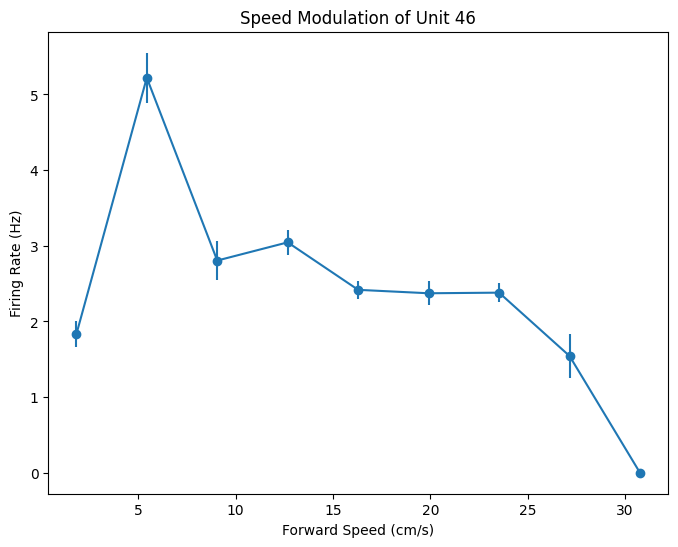

In [6]:
# Calculate speed modulation with error bars
print(f"Speed range: {np.min(speed_for):.1f} to {np.max(speed_for):.1f} cm/s")
bins = np.linspace(0, np.max(speed_for), 10)
bin_centers = (bins[:-1] + bins[1:]) / 2
firing_rates_by_speed = []
firing_rate_errors = []
time_in_bins = []

dt = 0.1  # Bin size in seconds for spike counting

for i in range(len(bin_centers)):
    speed_mask = (speed_for >= bins[i]) & (speed_for < bins[i+1])
    time_in_bin = np.sum(speed_mask) * dt
    time_in_bins.append(time_in_bin)
    
    if time_in_bin > 0:
        # Get all time windows in this speed bin
        speed_times = timestamps[speed_mask]
        rates = []
        
        # Calculate rate for each window
        for t_start in speed_times:
            spike_mask = (example_unit_spikes >= t_start) & (example_unit_spikes < t_start + dt)
            spike_count = np.sum(spike_mask)
            rates.append(spike_count / dt)
        
        # Calculate mean and SEM
        rates = np.array(rates)
        firing_rates_by_speed.append(np.mean(rates))
        firing_rate_errors.append(np.std(rates) / np.sqrt(len(rates)))
        print(f"Speed bin {bins[i]:.1f}-{bins[i+1]:.1f} cm/s: {len(rates)} samples")
    else:
        firing_rates_by_speed.append(0)
        firing_rate_errors.append(0)
        print(f"Speed bin {bins[i]:.1f}-{bins[i+1]:.1f} cm/s: No samples")

firing_rates_by_speed = np.array(firing_rates_by_speed)
firing_rate_errors = np.array(firing_rate_errors)

plt.figure(figsize=(8, 6))
plt.errorbar(bin_centers, firing_rates_by_speed, yerr=firing_rate_errors, fmt='o-')
plt.title(f'Speed Modulation of Unit {unit_idx}')
plt.xlabel('Forward Speed (cm/s)')
plt.ylabel('Firing Rate (Hz)')
plt.show()

## Example Scientific Questions

This dataset can be used to investigate several scientific questions, such as:

1. **Speed Encoding**
   - How do barrel cortex neurons encode movement speed?
   - Do different cortical layers show distinct speed tuning?
   - Is there a difference between encoding of forward vs lateral speed?

2. **Turn Responses**
   - How do neurons respond during left vs right turns?
   - Is there asymmetry between contralateral and ipsilateral turn responses?
   - Do turn responses vary by cortical layer?

3. **Population Analysis**
   - Can the animal's movement be decoded from the population activity?
   - How is movement information distributed across layers?
   - Are there distinct functional cell types based on response properties?

## Available Data Types

For researchers interested in further analysis, the dataset includes:

1. **Neural Data**
   - Spike times for all sorted units
   - Unit classifications (layer, type)
   - Quality metrics (SNR, isolation distance, etc.)

2. **Behavioral Data**
   - VR position feedback (`cor_pos`)
   - Movement speeds (`speed_for`, `speed_lat`)
   - Trial timing information
   - Distance measures (`distance_abs`, `distance_for`, `distance_lat`)

3. **Metadata**
   - Subject information
   - Recording location details
   - Experimental protocol